# $N_H$ computation

This tutorial aims at computing the column density for a given image using the HI4PI survey. The first cell is a mandatory data loading.

In [1]:
import astropy.units as u
from xsb_fluc.data.cluster import Cluster

cluster = Cluster(
    imglink='data/A2142/mosaic_a2142.fits.gz',
    explink='data/A2142/mosaic_a2142_expo.fits.gz',
    bkglink='data/A2142/mosaic_a2142_bkg.fits.gz',
    reglink='data/A2142/src_ps.reg',
    nhlink='data/A2142/A2142_nh.fits',
    ra=239.58615,
    dec=27.229433,
    r_500=1.403*u.Mpc, 
    redshift=0.09,
)

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
a floating-point value was expected. [astropy.wcs.wcs]


In the following cell, I show how to obtain a column density absorption map using the HI4PI survey (https://cade.irap.omp.eu/dokuwiki/doku.php?id=hi4pi). As the survey is provided in an Healpix file, it is very convenient to use. Reprojecting the $N_H$ map on an image is as easy as the following cell. 

In [2]:
from astropy.io import fits
from reproject import reproject_from_healpix

nh_hpx = fits.open('data/NHI_HPX.fits')
hdu = fits.open('data/A2142/mosaic_a2142.fits.gz')[0]
array, footprint = reproject_from_healpix(nh_hpx[1], hdu.header, field='NHI')

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
a floating-point value was expected. [astropy.wcs.wcs]


We now can plot and compare the reprojected map to the cluster mosaic. Note that the projection here is smoothed and interpolated, one could use the "true" pixels and no smoothing by changing arguments in `reproject_from_healpix`.

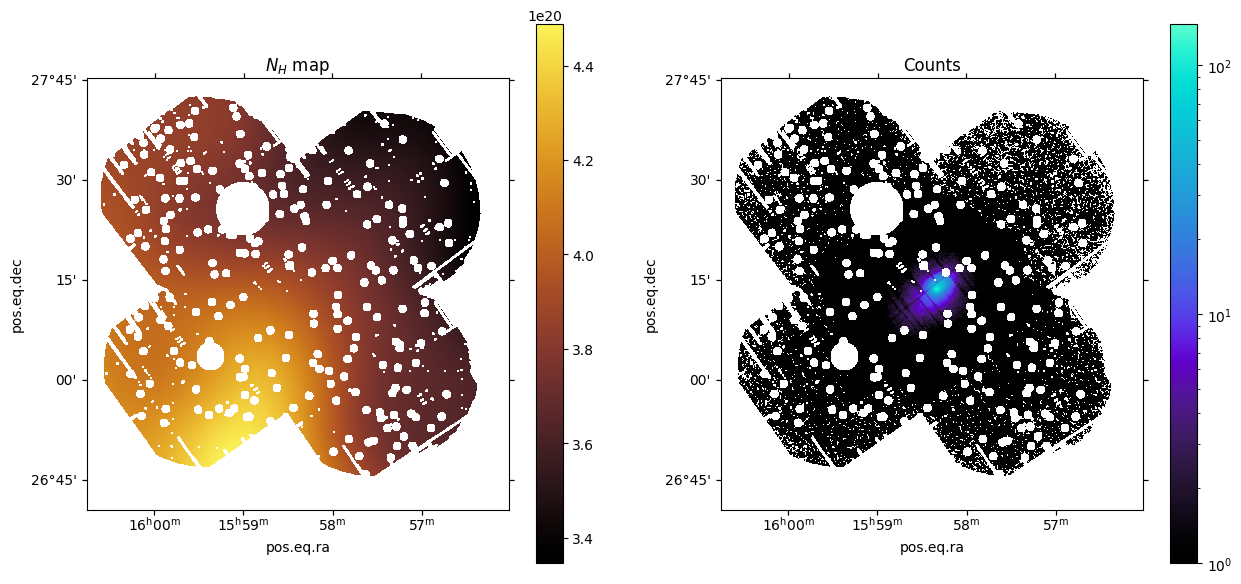

In [3]:
import numpy as np
import cmasher as cmr
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

plt.figure(figsize=(15,7))

ax1 = plt.subplot(1,2,1, projection=cluster.wcs)
mappable = ax1.imshow(np.where(cluster.exp>0, array, np.nan), origin='lower', cmap=cmr.amber)
plt.title('$N_H$ map')
plt.colorbar(mappable =mappable)

ax2 = plt.subplot(1,2,2, projection=cluster.wcs)
mappable = ax2.imshow(np.where(cluster.exp>0, cluster.img, np.nan), origin='lower', norm=LogNorm(), cmap=cmr.cosmic)
plt.title('Counts')
plt.colorbar(mappable =mappable)

plt.show()